## Import Library

In [62]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#for model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ANN model # Artificial Neural Network

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Import Data

In [63]:
df = pd.read_csv('Big Project Progress Data_ Kelompok 2.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [64]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### EDA

### Information of dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

C:\Users\Komang Novelia Dwi A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


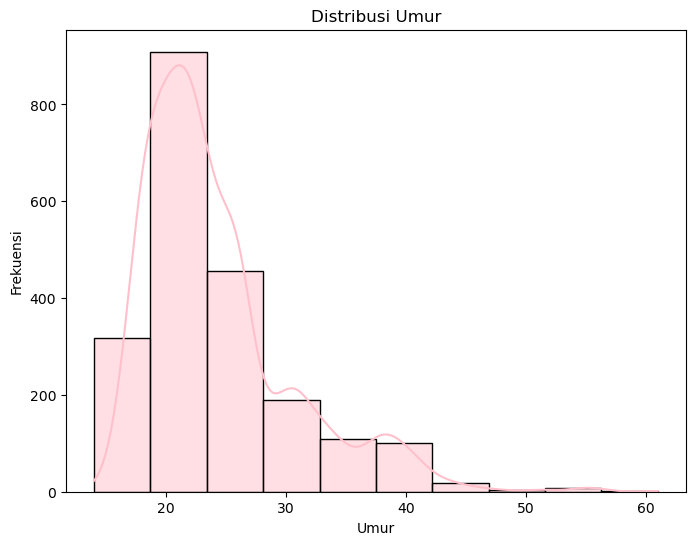

In [66]:
# Contoh visualisasi: Distribusi umur
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='pink')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [67]:
# Menggunakan value_counts() dan for loop
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

for column in columns:
    value_counts = df[column].value_counts()
    print(f"Jumlah kategori untuk kolom '{column}':")
    for category, count in value_counts.items():
        print(f"{category}: {count}")
    print()

Jumlah kategori untuk kolom 'Gender':
Male: 1068
Female: 1043

Jumlah kategori untuk kolom 'CALC':
Sometimes: 1401
no: 639
Frequently: 70
Always: 1

Jumlah kategori untuk kolom 'SCC':
no: 2015
yes: 96

Jumlah kategori untuk kolom 'SMOKE':
no: 2067
yes: 44

Jumlah kategori untuk kolom 'family_history_with_overweight':
yes: 1726
no: 385

Jumlah kategori untuk kolom 'CAEC':
Sometimes: 1765
Frequently: 242
Always: 53
no: 51

Jumlah kategori untuk kolom 'MTRANS':
Public_Transportation: 1580
Automobile: 457
Walking: 56
Motorbike: 11
Bike: 7



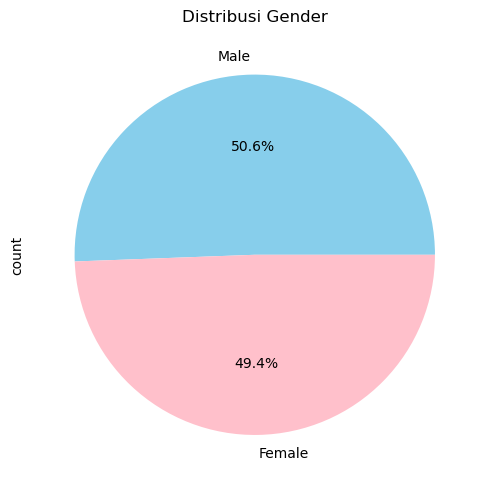

In [68]:
# Visualisasi Pie Plot

plt.figure(figsize=(5, 25))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title(f'Distribusi Gender')
plt.tight_layout()
plt.show()

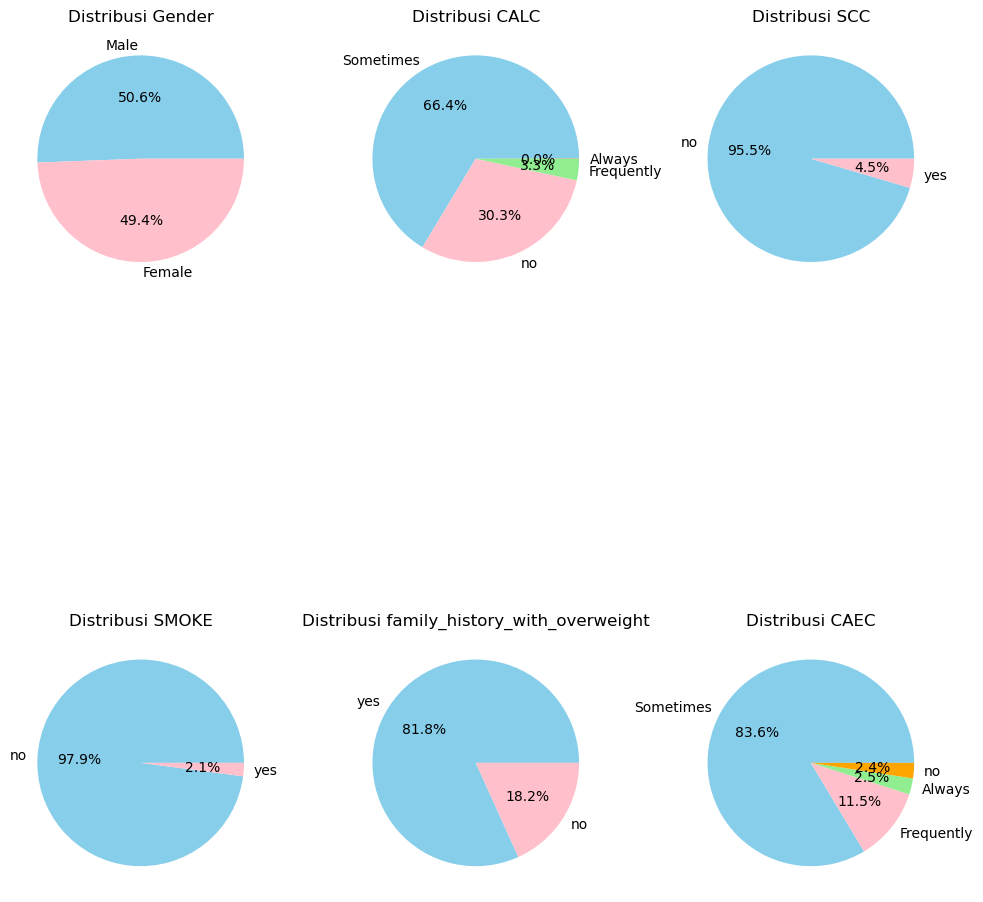

In [69]:
# Visualisasi Pie Plot
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC']

plt.figure(figsize=(10, 15))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink', 'lightgreen', 'orange'])
    plt.title(f'Distribusi {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

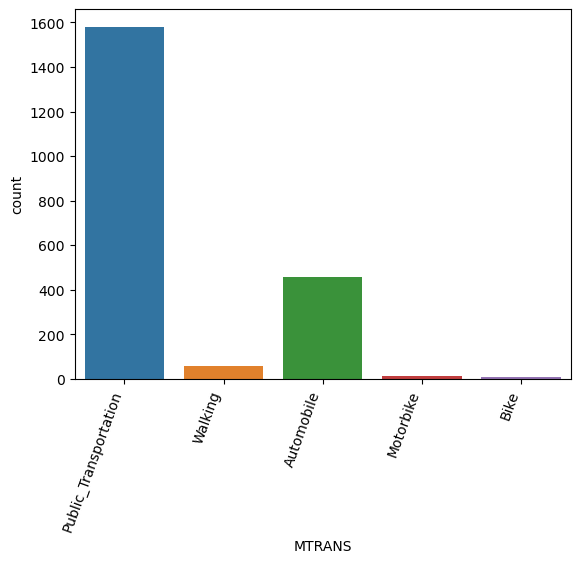

In [70]:
sns.countplot(x = df.MTRANS)
plt.xticks(rotation=70, ha='right') 
plt.show()

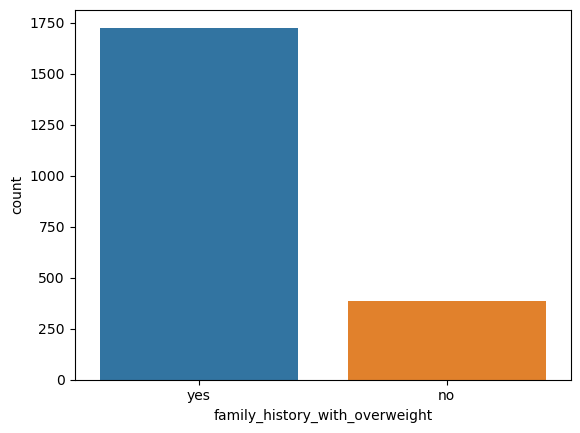

In [71]:
sns.countplot(x = df.family_history_with_overweight)
plt.show()

### Deskripsi statistik

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Check Missing Value

In [73]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [74]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Check Duplicated data

In [75]:
df.duplicated().sum()

24

In [76]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             2087 no

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [79]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop untuk melakukan label encoding pada setiap kolom kategori
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\Komang Novelia Dwi A\AppData\Local\Temp\ipykernel_13076\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Komang Novelia Dwi A\AppData\Local\Temp\ipykernel_13076\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Komang Novelia Dwi A\AppData\Local\Temp\ipykernel_13076\487940495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [80]:
df.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.050641,-0.031748,0.198160,-0.045565,0.063895,0.013572,-0.055823,-0.117959,0.091261,-0.044058,0.200379,-0.148202,-0.302927,0.092097,-0.601476,0.238308
Gender,0.050641,1.000000,0.626748,0.163176,0.010574,0.061220,-0.271575,0.077863,-0.102435,0.045501,0.095129,0.113492,0.189471,0.022356,0.074564,-0.139044,0.014699
Height,-0.031748,0.626748,1.000000,0.457468,-0.135756,0.180694,-0.040363,0.227806,-0.137078,0.054326,0.220487,0.232258,0.293584,0.041808,0.058001,-0.068258,0.038700
Weight,0.198160,0.163176,0.457468,1.000000,-0.211351,0.274655,0.216574,0.092149,-0.205409,0.024369,0.203823,0.492969,-0.056490,-0.079351,0.300271,0.009836,0.388802
CALC,-0.045565,0.010574,-0.135756,-0.211351,1.000000,-0.087661,-0.063132,-0.082985,-0.004175,-0.083181,-0.085460,0.028403,0.086825,0.041830,-0.039502,-0.009828,-0.132821
FAVC,0.063895,0.061220,0.180694,0.274655,-0.087661,1.000000,-0.025419,-0.006398,-0.191277,-0.050713,0.002993,0.214329,-0.111184,0.071505,0.147921,-0.069422,0.041023
FCVC,0.013572,-0.271575,-0.040363,0.216574,-0.063132,-0.025419,1.000000,0.034885,0.071179,0.013716,0.081332,0.033199,0.022003,-0.104128,-0.038565,0.069012,0.025728
NCP,-0.055823,0.077863,0.227806,0.092149,-0.082985,-0.006398,0.034885,1.000000,-0.020461,0.005009,0.075335,0.028411,0.127816,0.015693,-0.072316,-0.043648,-0.088235
SCC,-0.117959,-0.102435,-0.137078,-0.205409,-0.004175,-0.191277,0.071179,-0.020461,1.000000,0.047384,0.009325,-0.193947,0.073768,-0.012875,-0.109393,0.044381,-0.050936
SMOKE,0.091261,0.045501,0.054326,0.024369,-0.083181,-0.050713,0.013716,0.005009,0.047384,1.000000,-0.031642,0.014885,0.010811,0.016491,-0.054960,-0.009995,-0.023341


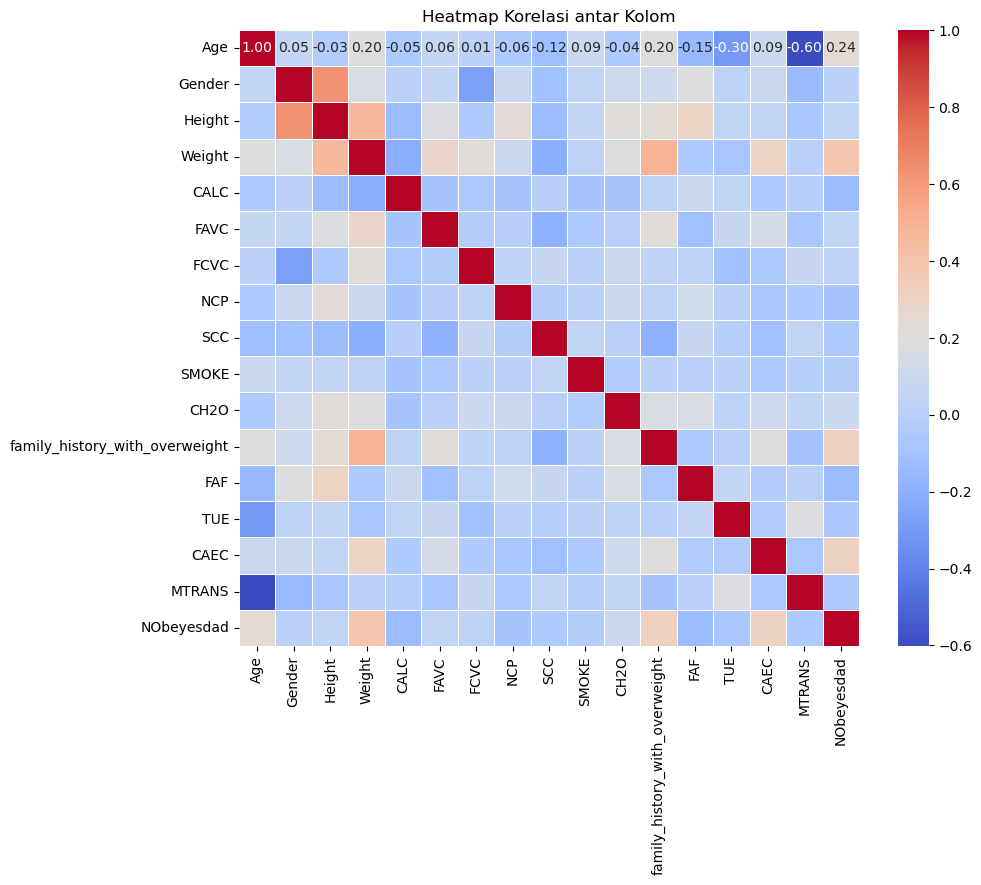

In [81]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

C:\Users\Komang Novelia Dwi A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komang Novelia Dwi A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


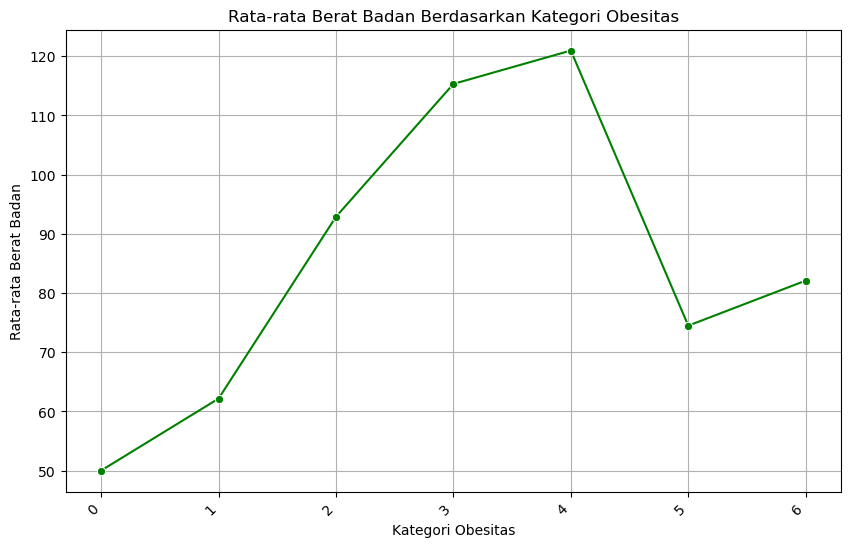

In [82]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Weight'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Weight', marker='o', color='g')
plt.title('Rata-rata Berat Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Berat Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

C:\Users\Komang Novelia Dwi A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komang Novelia Dwi A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


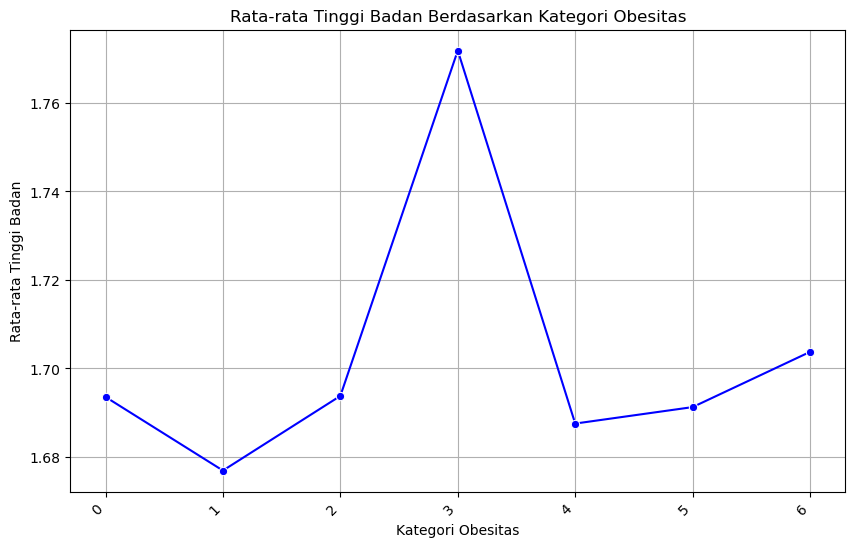

In [83]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Height'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Height', marker='o', color='blue')
plt.title('Rata-rata Tinggi Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Tinggi Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

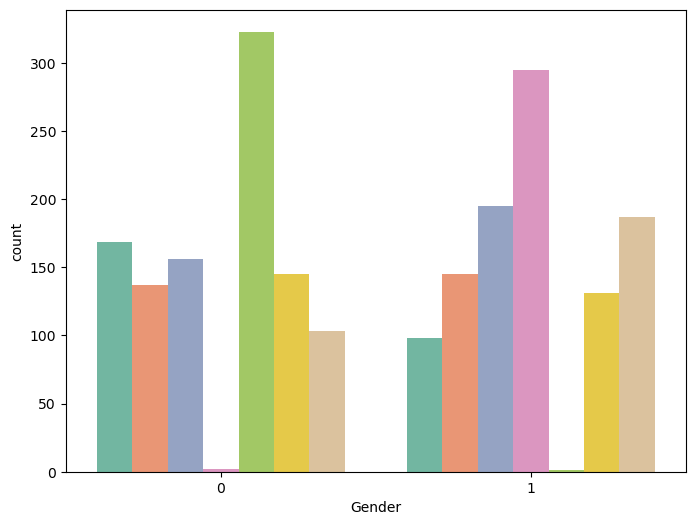

In [84]:
# Plot countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='NObeyesdad', palette='Set2')
plt.title('Jumlah Obesitas berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Obesitas')
plt.show()

### Check Imbalance

In [ ]:
df.NObeyesdad.value_counts()

In [ ]:
target = pd.DataFrame(df.NObeyesdad.value_counts())
target

In [ ]:
target.to_csv('Kolom_target.xlsx')

In [ ]:
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45, ha='right') 
plt.show()

In [ ]:
df

In [ ]:
df.info()

# Scaling

In [ ]:
df.columns

In [ ]:
columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'MTRANS']
scaler = StandardScaler()
df_scale = scaler.fit_transform(df[columns])

In [ ]:
df[columns]=df_scale

In [ ]:
df

# Splitting

In [ ]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

In [ ]:
y_train

In [ ]:
X_train

### Model

In [ ]:
# Memilih model terbaik untuk pengujian lebih lanjut
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

## Evaluasi Model

In [ ]:
# Evaluasi model terbaik
print("Evaluation of the best model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

# ANN 

# Splitting

In [ ]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

In [ ]:
y_train

In [ ]:
X_train

### Model

In [ ]:
X_train.shape

In [ ]:
X_train.shape[0]

In [ ]:
X_train.shape[1]

f(x) = max(0,x)

jika input < 0 , maka f(x) = 0
jika input > 0 , maka f(x) = x

In [ ]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(units= 32,activation='relu', input_shape=(X_train.shape[1],))) #input layer
model.add(Dense(units = 32,activation='relu')) #hidden # sunction activation = relu (leaky relu, dll), sigmoid, tanh, softmax
model.add(Dense(units = 32,activation='relu')) #hidden
model.add(Dense(7, activation='softmax')) # gunakan softmax: output > 2,
                                          # gunakan sigmoid: output = 2 
model.compile(loss ='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #  optimizer='adam', SGD, Adamax
model.summary() # loss ='categorical_crossentropy', sparse_categorical_crossentropy, binary_crossentropy

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode = 'min', restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate model

In [ ]:
evaluation = model.evaluate(X_test, y_test)

## **VISUALISASI**

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'red')
    plt.plot(history.history['val_'+string], color = 'blue')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.grid()
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

In [ ]:
y_test

In [ ]:
print("Evaluation model ann:")
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")